### **Decision Tree Classification**

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

**Data Loading and Inspection**


In [115]:
data = pd.read_csv("Social_Network_Ads.csv")

In [116]:
data.sample(10, random_state=42)

,Age,EstimatedSalary,Purchased
209,46,22000,0
280,59,88000,1
33,28,44000,0
210,48,96000,1
93,29,28000,0
84,30,62000,0
329,47,107000,1
94,29,83000,0
266,40,75000,0
126,42,65000,0


In [117]:
data.shape

(400, 3)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [119]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [120]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


**Exploratory Data Analysis (EDA)**


<Figure size 800x600 with 0 Axes>

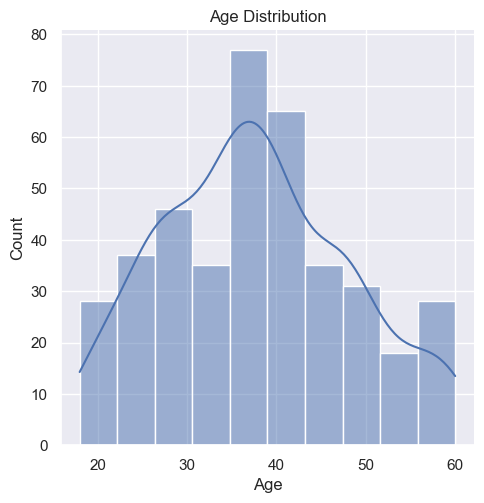

In [121]:
plt.figure(figsize=(8, 6))
sns.displot(data=data, x="Age", kde=True, bins=10)
plt.title("Age Distribution")
plt.show()

<Figure size 800x600 with 0 Axes>

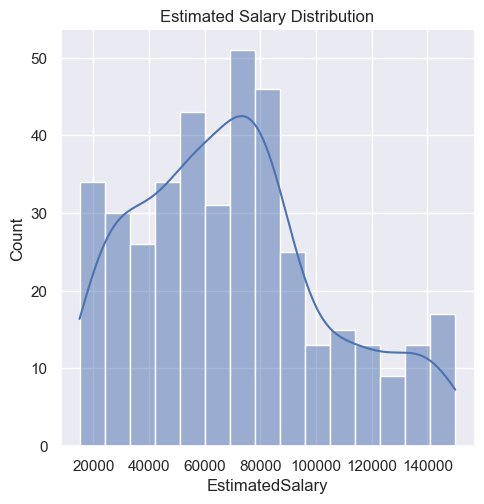

In [122]:
plt.figure(figsize=(8, 6))
sns.displot(data=data, x="EstimatedSalary", kde=True, bins=15)
plt.title("Estimated Salary Distribution")
plt.show()

**Data Preparation**


In [123]:
X = data.drop("Purchased", axis=1)
y = data["Purchased"].values.reshape(-1, 1)

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y, test_size=0.33, random_state=42
)

In [126]:
X_train.shape, X_test.shape

((268, 2), (132, 2))

**Feature Scaling**


In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Training a Decision Tree Classifier**


In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [130]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [131]:
classifier = DecisionTreeClassifier(random_state=42)
param_grid = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None, 3, 5, 10, 20, 30],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4],
}

In [132]:
random_search = RandomizedSearchCV(
    estimator=classifier,
    param_distributions=param_grid,
    n_iter=200,
    scoring="f1_weighted",
    n_jobs=-1,
    cv=5,
    random_state=42,
    verbose=1,
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 3, 5, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='f1_weighted', verbose=1)

In [133]:
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=10, random_state=42)

**Making Predictions And Evaluating The Model**


In [134]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix

In [135]:
f1_train = f1_score(y_train, best_model.predict(X_train))
print(f"F1 Score (Train):", f1_train)

F1 Score (Train): 0.898876404494382


In [136]:
y_test_pred = best_model.predict(X_test)

In [137]:
f1_test = f1_score(y_test, y_test_pred)
print(f"F1 Score (Test):", f1_test)

F1 Score (Test): 0.8910891089108911


In [138]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        80
           1       0.92      0.87      0.89        52

    accuracy                           0.92       132
   macro avg       0.92      0.91      0.91       132
weighted avg       0.92      0.92      0.92       132



**Plot the Confusion Matrix**


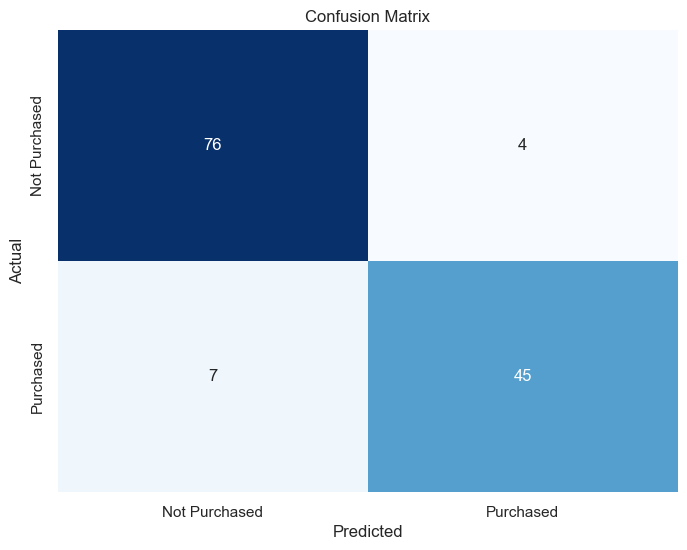

In [139]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=["Not Purchased", "Purchased"],
    yticklabels=["Not Purchased", "Purchased"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Visualizing the Decision Tree**


In [140]:
from sklearn.tree import plot_tree

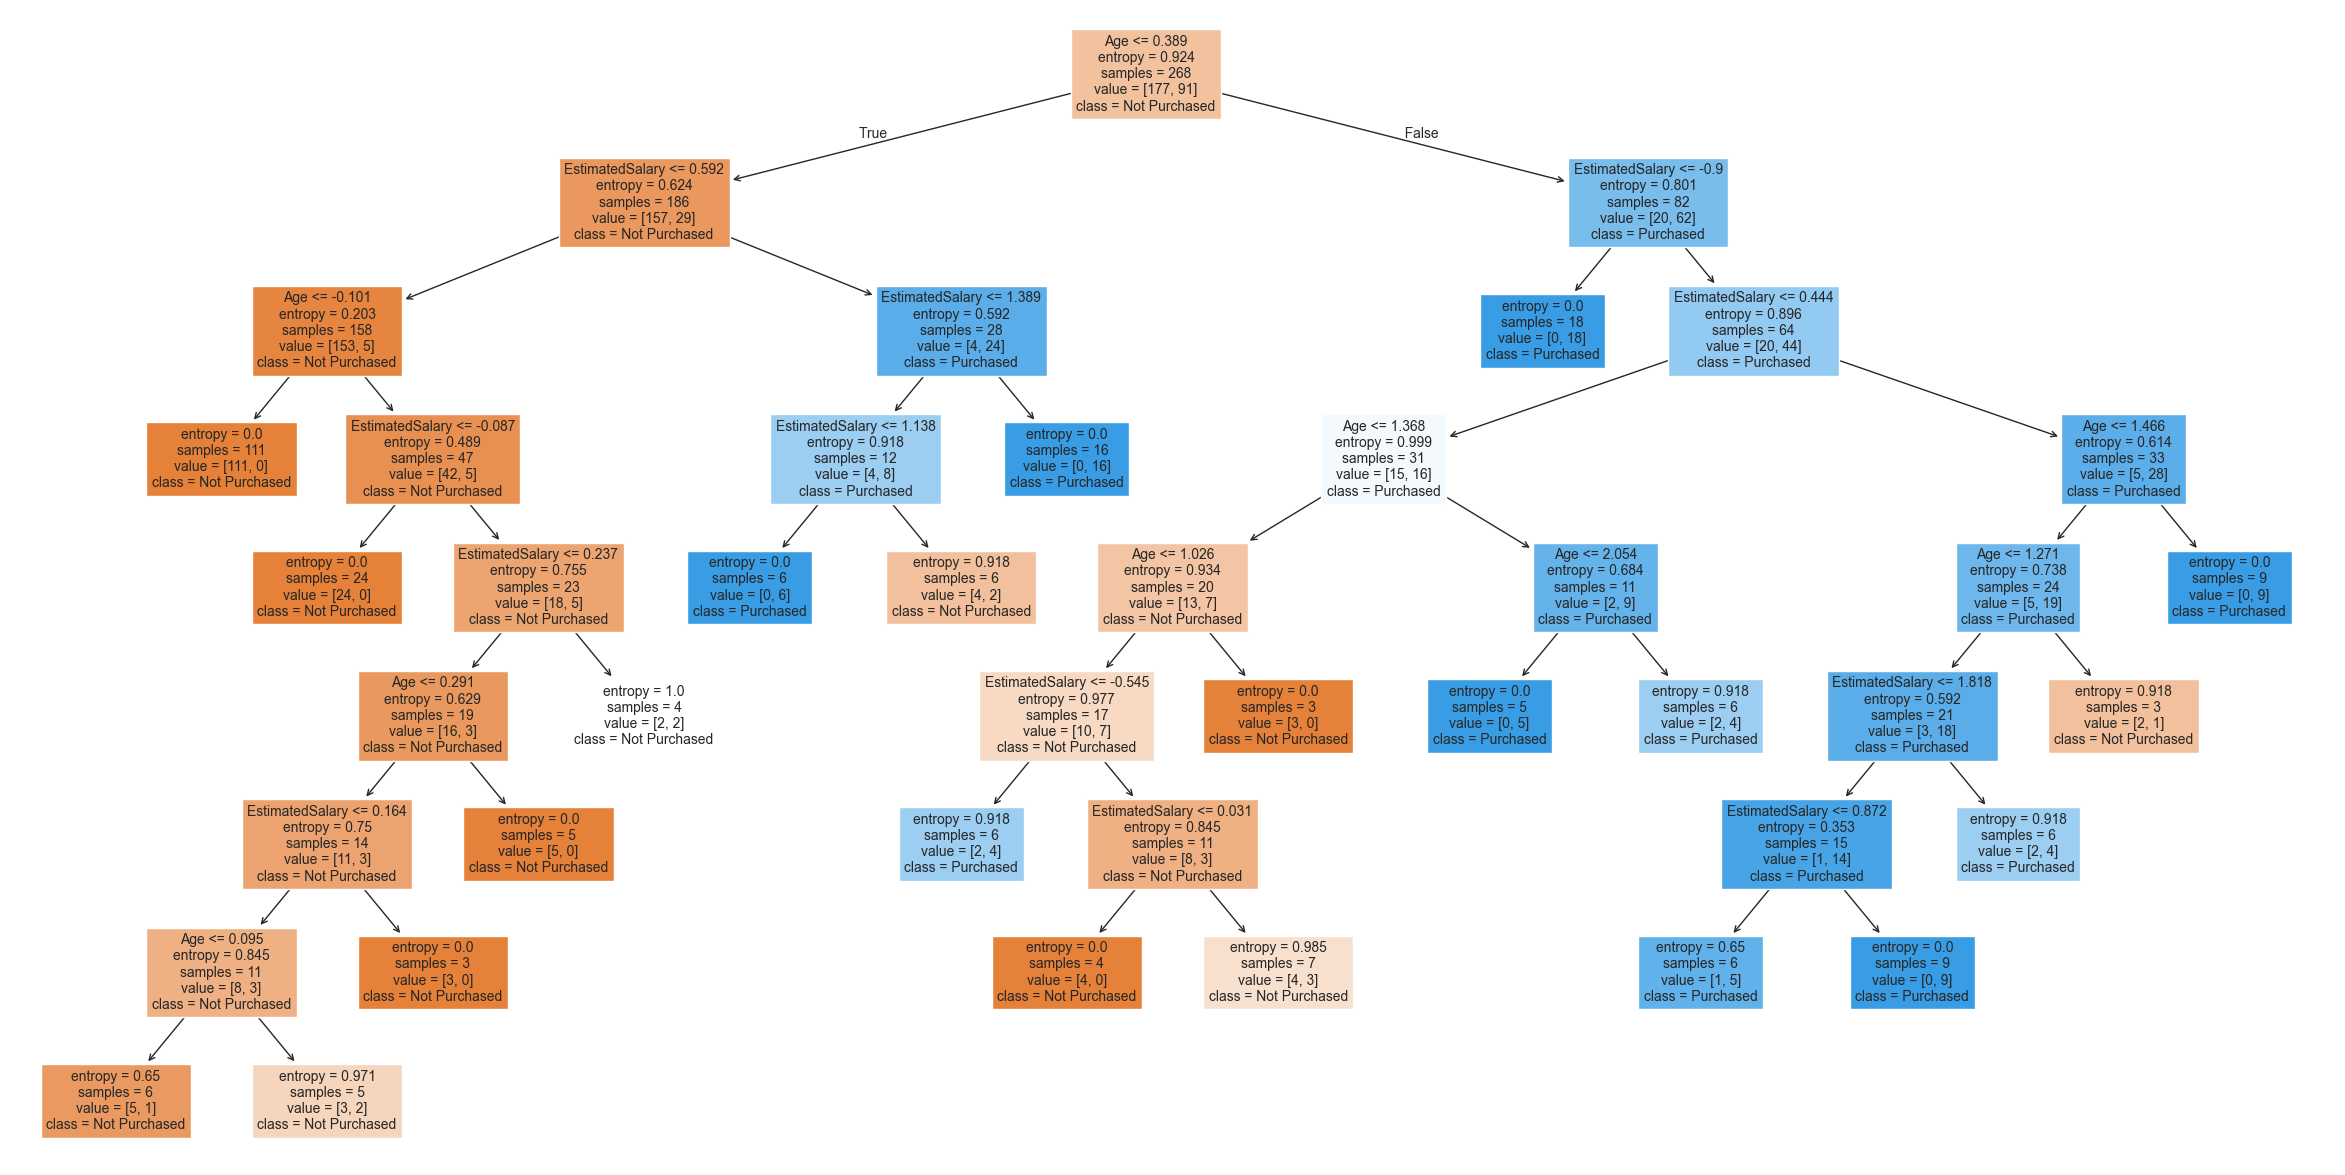

In [141]:
plt.figure(figsize=(30, 15))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=["Not Purchased", "Purchased"],
    filled=True,
    fontsize=10,
)
plt.savefig("Decision_Tree.png")
plt.show()